# Sentiment Analysis Project 

## To read the content of text files in a given folder

In [1]:
import os
import pandas as pd
from os.path import isfile, join
from os import listdir
import warnings 
def read_file(sentiment):
    case_file_path = sentiment + '/'
    case_onlyfiles = [f for f in os.listdir(case_file_path) if isfile(join(case_file_path, f))]
    
    data_list = []
    #reads each file's content
    for i in case_onlyfiles:
        with open(sentiment + '/' + i, 'r', encoding="utf8") as file:
            data = file.read().replace('\n','')
            data_list.append(data)
    res = pd.DataFrame(data_list, columns=['Comment'])
    res['Sentiment'] = sentiment
    return res
pos = 'pos'
neg = 'neg'
pos = read_file(pos)
neg = read_file(neg)

df = pd.concat([pos, neg]).reset_index().drop('index', axis = 1)
df = df.sample( frac = 1)
df = df.sample( frac = 1)

In [2]:
df.head()

,Comment,Sentiment
102,"""Qaçaq"" yəqin ki, indiyə qədər çəkilmiş ən böy...",pos
1497,Bu film mick jaggerin abe lincoln saqqalı ilə ...,neg
1000,süjet: iki yeniyetmə cütlük kilsə ziyafətinə g...,neg
1055,gözləntilərinizi necə məğlub edə biləcəyiniz g...,neg
622,Dennis Rodmanın əslində bu planetdən olub-olma...,pos


In [3]:
df['Comment'][0]

'komikslərdən uyğunlaşdırılmış filmlər, istər super qəhrəmanlar ( batman , superman , kürü ) haqqında olsun , istərsə də uşaqlara ( casper ) və ya arthouse izdihamına ( xəyal dünyası ) yönəlmiş olsun , bir çox uğur qazanıb , lakin heç vaxt belə bir komik kitab olmayıb. əvvəl cəhənnəmdən.yeni başlayanlar üçün onu 80-ci illərin ortalarında Watchmen adlı 12 hissədən ibarət seriyası ilə medianı tamamilə yeni səviyyəyə gətirən alan Mur (və Eddie Kempbell) yaradıb.Mur və Kempbellin jak mövzusunu hərtərəfli araşdırdıqlarını söyləmək ripper, Michael Jackson\'un bir az qəribə görünməyə başladığını söyləmək kimi olardı.kitab (və ya əgər istəyirsinizsə, "qrafik roman") uzunluğu 500 səhifədən çoxdur və əlavə qeydlərdən başqa heç nədən ibarət olmayan 30-a yaxın səhifəni əhatə edir.başqa sözlə , bu filmi mənbəsinə görə rədd etməyin .Əgər bütün komiks işini keçə bilsəniz, cəhənnəmin rejissorları Albert və Allen Hughes tərəfindən başqa bir büdrəmə bloku tapa bilərsiniz.Hughes qardaşlarının buna rejiss

In [4]:
df.shape

(2000, 2)

In [5]:
df.isna().sum()

Comment      0
Sentiment    0
dtype: int64

no missing values 

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

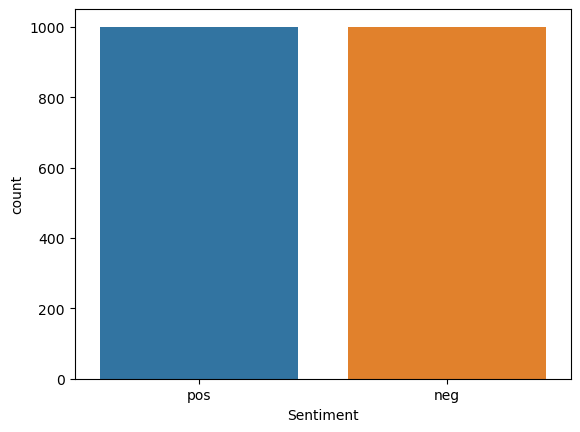

In [6]:
import seaborn as sns
sns.countplot(x = "Sentiment", data = df)

In [7]:
df["Sentiment"].value_counts()

pos    1000
neg    1000
Name: Sentiment, dtype: int64

In [8]:
df.reset_index(inplace=True, drop=True)

# Text Pre-processing 

In [9]:
df.head()

,Comment,Sentiment
0,"""Qaçaq"" yəqin ki, indiyə qədər çəkilmiş ən böy...",pos
1,Bu film mick jaggerin abe lincoln saqqalı ilə ...,neg
2,süjet: iki yeniyetmə cütlük kilsə ziyafətinə g...,neg
3,gözləntilərinizi necə məğlub edə biləcəyiniz g...,neg
4,Dennis Rodmanın əslində bu planetdən olub-olma...,pos


In [10]:
df["Comment"] = df['Comment'].str.replace("I", "ı").replace("İ", "i") # Because of Azerbaijani alphabet  
df["Comment"] = df['Comment'].str.lower()

Convert all words into the lower case 

In [11]:
df.head()

,Comment,Sentiment
0,"""qaçaq"" yəqin ki, indiyə qədər çəkilmiş ən böy...",pos
1,bu film mick jaggerin abe lincoln saqqalı ilə ...,neg
2,süjet: iki yeniyetmə cütlük kilsə ziyafətinə g...,neg
3,gözləntilərinizi necə məğlub edə biləcəyiniz g...,neg
4,dennis rodmanın əslində bu planetdən olub-olma...,pos


###  Breake a sentence into individual words

In [12]:
# Tokenization
def tokenize_sentence_into_words(string):
    str_SEN = ""
    str_ = ""
    string = string.strip()
    len_str = len(string)
    string += ' '
    char_index = -1
    for char in string:
        char_index += 1
        dot_sep = (char == "." and char_index != len_str - 1)

        if char.isnumeric() or char.isalpha() or char == "-" or char == "–" or dot_sep:

            str_ += char

        else:
            if str_ != "":
                str_SEN += str_ + " "
                str_ = ""
            if char != " ":
                str_SEN += char + " "
    final_str = ""
    for word in str_SEN.strip().split():
        final_str += word.strip(",.") + " "
    return " ".join(final_str.strip().split())

In [13]:
import string

In [14]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
translator=str.maketrans('','',string.punctuation)
df["Comment"]=df["Comment"].str.translate(translator)

In [16]:
df["Comment"][0]

'qaçaq yəqin ki indiyə qədər çəkilmiş ən böyük trillerlərdən biridirrealist inandırıcı personajlar alır və bütün boyu inandırıcı olan həyəcan verici bir hekayə danışırbu hərəkət naminə ən yüksək səviyyəli hərəkət filmi deyil bu əsl sirr hissi ilə ağıllı bir macəra hekayəsidir və mükəmməl işləyirharrison ford ulduzları dr richard kimbl arvadını öldürməkdə haqsız yerə günahlandırılan və məhkum edilən bir adamhekayənin bütün əsası bu qətl ətrafında cərəyan edir lakin düz bir şəkildə deyilmirkimblin nöqteyinəzərindən cinayətə davamlı olaraq geri dönüşlər görürükgecənin müxtəlif vaxtlarından atılan ipuçları kimblenin həyat yoldaşı helen  sela koğuş  öldürüldühekayənin çox uzağına qədər qatilin kim olduğunu görə bilmirikəslində  hətta özümüz də kimblin günahsızlığına bir az da şübhəmiz ola bilər film hekayənin mahiyyəti olmadığı üçün kimblenin mühakiməsi və məhkum edilməsinin təfərrüatlarına çox vaxt sərf etmirən böyük fəaliyyət səhnələrindən biri onun məhbus yoldaşları tərəfindən fantastik 

In [17]:
df.reset_index(inplace=True, drop=True)

In [18]:
for i in range(df.shape[0]):
    if df["Comment"][i] != str(df["Comment"][i]):
        continue
    df.at[i, "Comment"] = tokenize_sentence_into_words(df["Comment"][i])

In [19]:
df.head(10)

,Comment,Sentiment
0,qaçaq yəqin ki indiyə qədər çəkilmiş ən böyük ...,pos
1,bu film mick jaggerin abe lincoln saqqalı ilə ...,neg
2,süjet iki yeniyetmə cütlük kilsə ziyafətinə ge...,neg
3,gözləntilərinizi necə məğlub edə biləcəyiniz g...,neg
4,dennis rodmanın əslində bu planetdən olubolmad...,pos
5,i ̇ cazə verin mən peşəkar güləşin böyük pərəs...,neg
6,touchstone pictures və spyglass əyləncə jackie...,pos
7,bu günlərdə köhnə kult televiziya şouları əsas...,neg
8,kaş ki müasir dünyada iman və əxlaq məsələləri...,neg
9,qızdırmalı tənqidi bağışla amma pota şövqü yol...,neg


In [20]:
df['Comment'] = df['Comment'].values.astype('str')

In [21]:
df['Comment']

0       qaçaq yəqin ki indiyə qədər çəkilmiş ən böyük ...
1       bu film mick jaggerin abe lincoln saqqalı ilə ...
2       süjet iki yeniyetmə cütlük kilsə ziyafətinə ge...
3       gözləntilərinizi necə məğlub edə biləcəyiniz g...
4       dennis rodmanın əslində bu planetdən olubolmad...
                              ...                        
1995    rejissor stiven zaillian əvvəllər 1993cü ildə ...
1996    qaralı adamlar elmi fantastika hərəkət və kome...
1997    sümüyə çalın ron şeltonun idman temalı repertu...
1998    “ şeytan məni nə vaxt aparacaq ” o ritorik ola...
1999    qaraağac küçəsində kabus seriyasına ilk dəfə m...
Name: Comment, Length: 2000, dtype: object

# NaiveBayes with CountVectorizer (Representing the string in numerical form)

In [22]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [23]:
text_clf = Pipeline(steps=[('vec',
                 CountVectorizer(analyzer='char_wb', ngram_range=(3, 4))),
                ('clf', MultinomialNB())])

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df['Comment'], df['Sentiment'],test_size = 0.2,random_state = 42)


In [25]:
text_clf.fit(x_train, y_train)

Pipeline(steps=[('vec',
                 CountVectorizer(analyzer='char_wb', ngram_range=(3, 4))),
                ('clf', MultinomialNB())])

# Prediction

In [26]:
text_clf.predict(["bu çox pis videodur"])

array(['neg'], dtype='<U3')

In [27]:
text_clf.predict(["bu əladi"])

array(['pos'], dtype='<U3')

In [28]:
text_clf.predict(["bu programda problem var"])

array(['neg'], dtype='<U3')

# Scoring 

In [29]:
text_clf.score(x_train,y_train)

0.955

In [30]:
text_clf.score(x_test,y_test) # Accuracy

0.8225

In [31]:
y_pred = text_clf.predict(x_test)

In [32]:
y_pred

array(['pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg',
       'neg', 'neg', 'neg', 'neg', 'pos', 'pos', 'pos', 'neg', 'neg',
       'pos', 'neg', 'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos',
       'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos',
       'neg', 'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'pos', 'pos',
       'pos', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg',
       'neg', 'pos', 'pos', 'pos', 'neg', 'pos', 'neg', 'neg', 'pos',
       'pos', 'neg', 'neg', 'pos', 'neg', 'pos', 'neg', 'pos', 'pos',
       'neg', 'pos', 'pos', 'pos', 'pos', 'neg', 'neg', 'neg', 'pos',
       'neg', 'neg', 'pos', 'pos', 'neg', 'neg', 'pos', 'neg', 'pos',
       'pos', 'pos', 'pos', 'neg', 'pos', 'pos', 'neg', 'pos', 'neg',
       'pos', 'pos', 'neg', 'neg', 'neg', 'pos', 'pos', 'neg', 'neg',
       'pos', 'neg', 'neg', 'pos', 'neg', 'neg', 'pos', 'pos', 'pos',
       'pos', 'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg',
       'neg', 'pos',

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         neg       0.82      0.82      0.82       201
         pos       0.82      0.82      0.82       199

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



# Confusion matrix 

Confusion Matrix:
[[165  36]
 [ 35 164]]


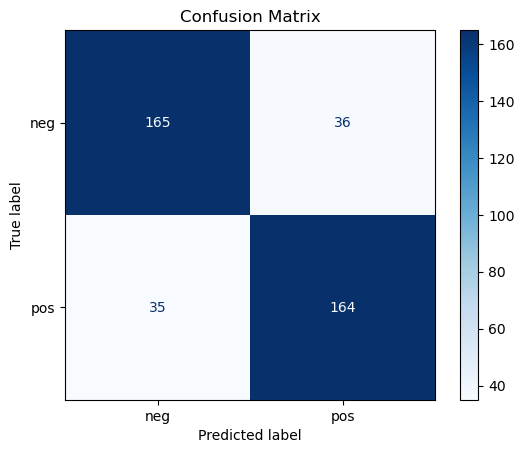

In [34]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = text_clf.predict(x_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

# Get unique labels from y_test
unique_labels = sorted(list(set(y_test)))

# Create the ConfusionMatrixDisplay with unique labels
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=unique_labels)

cm_display.plot(cmap=plt.cm.Blues, values_format='d', ax=None)

print("Confusion Matrix:")
print(confusion_matrix)

plt.title("Confusion Matrix")
plt.show()


# Saving to Pickle file 

In [35]:
import pickle

In [36]:
filename='sentimentanalysiswithNaivebayes.pkl'

In [37]:
with open(filename,'wb') as file:
    pickle.dump(text_clf, file)

# Testing Pickle File 

In [38]:
filename='sentimentanalysiswithNaivebayes.pkl'

In [39]:
with open(filename,'rb') as file:
    text_clf = pickle.load(file)

In [40]:
text_clf.predict(["salam. menim akkauntumda  problem var"])

array(['neg'], dtype='<U3')

# SVM and TFidfVectorizer

In [41]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['Comment'], df['Sentiment'], test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(analyzer="word", ngram_range=(1, 2), max_features=5000, sublinear_tf=True)
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

# SVM Model with optimized hyperparameters
svm_clf = SVC(C=1, kernel='linear')
svm_clf.fit(x_train_tfidf, y_train)

SVC(C=1, kernel='linear')

## Prediction 

In [43]:
input_texts = ["bu çox pis videodur", "bu əladır", "bu programda problem var"]

for text in input_texts:
    prediction = svm_clf.predict(tfidf_vectorizer.transform([text]))
    print(f"Prediction for '{text}': {prediction}")

Prediction for 'bu çox pis videodur': ['neg']
Prediction for 'bu əladır': ['pos']
Prediction for 'bu programda problem var': ['neg']


## Scoring 

In [44]:
train_score_svm = svm_clf.score(x_train_tfidf, y_train)
test_score_svm = svm_clf.score(x_test_tfidf, y_test)
print("SVM Train Accuracy:", train_score_svm)
print("SVM Test Accuracy:", test_score_svm)

SVM Train Accuracy: 0.98625
SVM Test Accuracy: 0.8525


In [45]:
from sklearn.metrics import classification_report

y_pred_svm = svm_clf.predict(x_test_tfidf)

print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

         neg       0.86      0.84      0.85       201
         pos       0.84      0.86      0.85       199

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



In [46]:
y_pred_svm

array(['pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg',
       'neg', 'neg', 'neg', 'neg', 'pos', 'pos', 'pos', 'neg', 'pos',
       'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos',
       'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos',
       'neg', 'neg', 'neg', 'neg', 'pos', 'neg', 'pos', 'pos', 'pos',
       'neg', 'neg', 'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'neg',
       'neg', 'pos', 'neg', 'pos', 'neg', 'pos', 'pos', 'neg', 'pos',
       'pos', 'neg', 'neg', 'pos', 'neg', 'neg', 'neg', 'pos', 'pos',
       'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'neg', 'neg', 'pos',
       'neg', 'pos', 'neg', 'pos', 'neg', 'pos', 'pos', 'neg', 'pos',
       'pos', 'pos', 'pos', 'neg', 'pos', 'pos', 'neg', 'pos', 'pos',
       'pos', 'pos', 'neg', 'neg', 'neg', 'pos', 'pos', 'pos', 'neg',
       'neg', 'pos', 'pos', 'pos', 'neg', 'neg', 'pos', 'neg', 'pos',
       'pos', 'neg', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg',
       'neg', 'pos',

## Confusion Matrix

SVM Confusion Matrix:
[[169  32]
 [ 27 172]]


Text(0.5, 1.0, 'SVM Confusion Matrix')

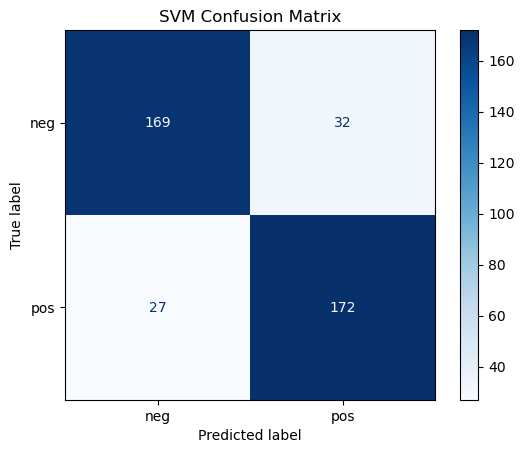

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)
unique_labels = sorted(list(set(y_test)))

cm_display_svm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_svm, display_labels=unique_labels)
cm_display_svm.plot(cmap=plt.cm.Blues, values_format='d', ax=None)

print("SVM Confusion Matrix:")
print(confusion_matrix_svm)

plt.title("SVM Confusion Matrix")

## Saving to pickle file 

In [48]:
import pickle

In [49]:
fn = 'sentimentAnalysisWithSvm'

In [50]:
with open(fn,'wb') as file:
    pickle.dump(svm_clf, file)

## Testing pickle file

In [51]:
fn = 'sentimentAnalysisWithSvm'

In [52]:
with open(fn,'rb') as file:
    loaded_svm_clf = pickle.load(file)

In [54]:
# Perform predictions using the loaded SVM model
input_texts = ["salam. menim akkauntumda problem var"]
for text in input_texts:
    transformed_input = tfidf_vectorizer.transform([text]) 
    prediction = loaded_svm_clf.predict(transformed_input)
    print(f"Prediction for '{text}': {prediction}")


Prediction for 'salam. menim akkauntumda problem var': ['neg']


# Logistic regression

In [55]:
# Import necessary libraries for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['Comment'], df['Sentiment'], test_size=0.2, random_state=42)

In [57]:
# Create and train a Logistic Regression model
logreg_clf = LogisticRegression(max_iter=2000)
logreg_clf.fit(x_train_tfidf, y_train)


LogisticRegression(max_iter=2000)

## Prediction

In [58]:
input_texts = ["bu çox pis videodur", "bu əladi", "bu programda problem var"]
for text in input_texts:
    prediction = logreg_clf.predict(tfidf_vectorizer.transform([text]))
    print(f"Prediction for '{text}': {prediction}")

Prediction for 'bu çox pis videodur': ['neg']
Prediction for 'bu əladi': ['neg']
Prediction for 'bu programda problem var': ['neg']


## Scoring 

In [59]:
# Calculate training and testing accuracy
train_score_logreg = logreg_clf.score(x_train_tfidf, y_train)
test_score_logreg = logreg_clf.score(x_test_tfidf, y_test)
print("Logistic Regression Train Accuracy:", train_score_logreg)
print("Logistic Regression Test Accuracy:", test_score_logreg)

Logistic Regression Train Accuracy: 0.97125
Logistic Regression Test Accuracy: 0.8675


In [60]:
from sklearn.metrics import classification_report

y_pred_logreg = logreg_clf.predict(x_test_tfidf)

print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

         neg       0.87      0.86      0.87       201
         pos       0.86      0.87      0.87       199

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



In [61]:
y_pred_logreg

array(['pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg',
       'neg', 'neg', 'neg', 'neg', 'pos', 'pos', 'pos', 'neg', 'neg',
       'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos',
       'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos',
       'neg', 'neg', 'neg', 'neg', 'pos', 'neg', 'pos', 'pos', 'pos',
       'neg', 'neg', 'neg', 'pos', 'neg', 'pos', 'neg', 'neg', 'neg',
       'neg', 'pos', 'neg', 'pos', 'neg', 'pos', 'pos', 'neg', 'pos',
       'pos', 'neg', 'neg', 'pos', 'neg', 'pos', 'neg', 'pos', 'pos',
       'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'neg', 'neg', 'pos',
       'neg', 'pos', 'pos', 'pos', 'neg', 'pos', 'pos', 'neg', 'pos',
       'pos', 'pos', 'pos', 'neg', 'pos', 'pos', 'neg', 'pos', 'pos',
       'pos', 'pos', 'neg', 'neg', 'neg', 'pos', 'pos', 'pos', 'pos',
       'neg', 'neg', 'pos', 'pos', 'neg', 'neg', 'pos', 'neg', 'pos',
       'pos', 'neg', 'pos', 'neg', 'neg', 'neg', 'neg', 'pos', 'neg',
       'neg', 'pos',

Logistic Regression Confusion Matrix:
[[173  28]
 [ 25 174]]


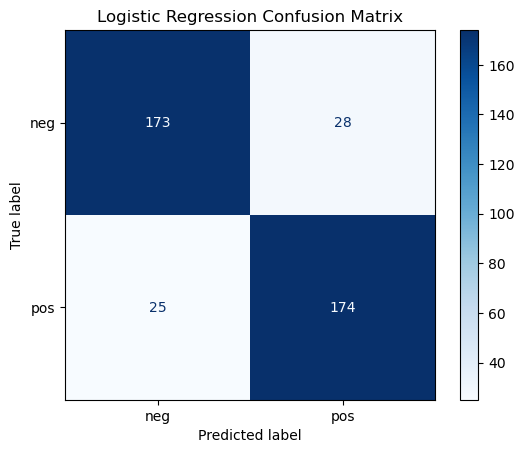

In [62]:
confusion_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
unique_labels = sorted(list(set(y_test)))

cm_display_logreg = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_logreg, display_labels=unique_labels)
cm_display_logreg.plot(cmap=plt.cm.Blues, values_format='d', ax=None)

print("Logistic Regression Confusion Matrix:")
print(confusion_matrix_logreg)

plt.title("Logistic Regression Confusion Matrix")
plt.show()

## Saving to Pickle File

In [63]:
import pickle

In [64]:
fn3='sentimentanalysisWithLogisticReg.pkl'

In [65]:
with open(fn3,'wb') as file:
    pickle.dump(logreg_clf, file)

## Testing Pickle File 

In [66]:
filename='sentimentanalysis.pkl'

In [67]:
with open(fn3,'rb') as file:
    loaded_logreg_clf = pickle.load(file)

In [68]:
input_texts = ["salam. menim akkauntumda problem var"]
for text in input_texts:
    transformed_input = tfidf_vectorizer.transform([text]) 
    prediction = loaded_logreg_clf.predict(transformed_input)
    print(f"Prediction for '{text}': {prediction}")


Prediction for 'salam. menim akkauntumda problem var': ['neg']
